In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv


In [13]:
df = pd.read_csv('2022.csv')
df = df.iloc[:, 1:3]
df.head(10)


,Country,Happiness score
0,Finland,7.821
1,Denmark,7.636
2,Iceland,7.557
3,Switzerland,7.512
4,Netherlands,7.415
5,Luxembourg*,7.404
6,Sweden,7.384
7,Norway,7.365
8,Israel,7.364
9,New Zealand,7.200


In [14]:
df2 = pd.read_csv('air_pollution.csv')
df2 = df2.iloc[:, [0,1,7]]
df2.head()

,City,Country,2022
0,Kabul,Afghanistan,17.1
1,Tirana,Albania,14.5
2,Algiers,Algeria,17.8
3,Ordino,Andorra,5.4
4,Luanda,Angola,8.8


In [15]:
df3 = pd.read_csv('countries.csv')
df3.head()

,Continent,Country,City
0,Europe,Albania,Tirana
1,Europe,Andorra,Andorra la Vella
2,Europe,Armenia,Yerevan
3,Europe,Austria,Vienna
4,Europe,Azerbaijan,Baku


In [16]:
import pandas as pd


# Sort both DataFrames
df1_sorted = df2.sort_values(by='Country')
df2_sorted = df3.sort_values(by='Country')
df3_sorted = df.sort_values(by='Country')

# Merge DataFrames on column 'A' with inner join
result = pd.merge(df1_sorted,df2_sorted, on=['Country','City' ], how='right')
result = pd.merge(result,df3_sorted, on=['Country'], how='right')



result.to_csv('2022Data.csv', index=False)

result.head()


,City,Country,2022,Continent,Happiness score
0,Kabul,Afghanistan,17.1,Asia,2.404
1,Tirana,Albania,14.5,Europe,5.199
2,Algiers,Algeria,17.8,Africa,5.122
3,Buenos Aires,Argentina,14.2,South America,5.967
4,Yerevan,Armenia,31.4,Asia,5.399


In [17]:
analysis = pd.read_csv('2022Data.csv')
analysis = analysis.iloc[:,[3,1,2,4]]
analysis = analysis.dropna()
analysis = analysis.rename(columns={"2022": "PM2.5", "Happiness score": "Happiness Score"})
analysis.to_csv('2022Data.csv', index=False)
analysis.head()

,Continent,Country,PM2.5,Happiness Score
0,Asia,Afghanistan,17.1,2.404
1,Europe,Albania,14.5,5.199
2,Africa,Algeria,17.8,5.122
3,South America,Argentina,14.2,5.967
4,Asia,Armenia,31.4,5.399


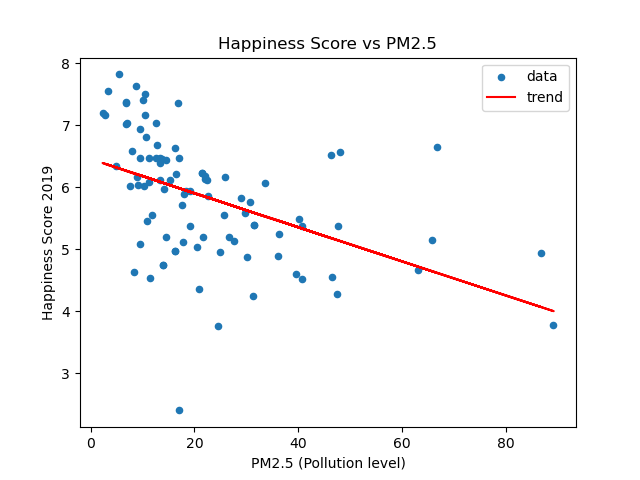

In [18]:
fig, ax = plt.subplots()
ax = analysis.plot.scatter(x='PM2.5', y='Happiness Score', ax=ax)
ax.set_title('Happiness Score vs PM2.5')
ax.set_xlabel('PM2.5 (Pollution level)')
ax.set_ylabel('Happiness Score 2019')
model = np.polyfit(analysis['PM2.5'], analysis['Happiness Score'], 1)
ax.plot(analysis['PM2.5'], np.polyval(model, analysis['PM2.5']), color='r')
ax.legend(["data", "trend"])




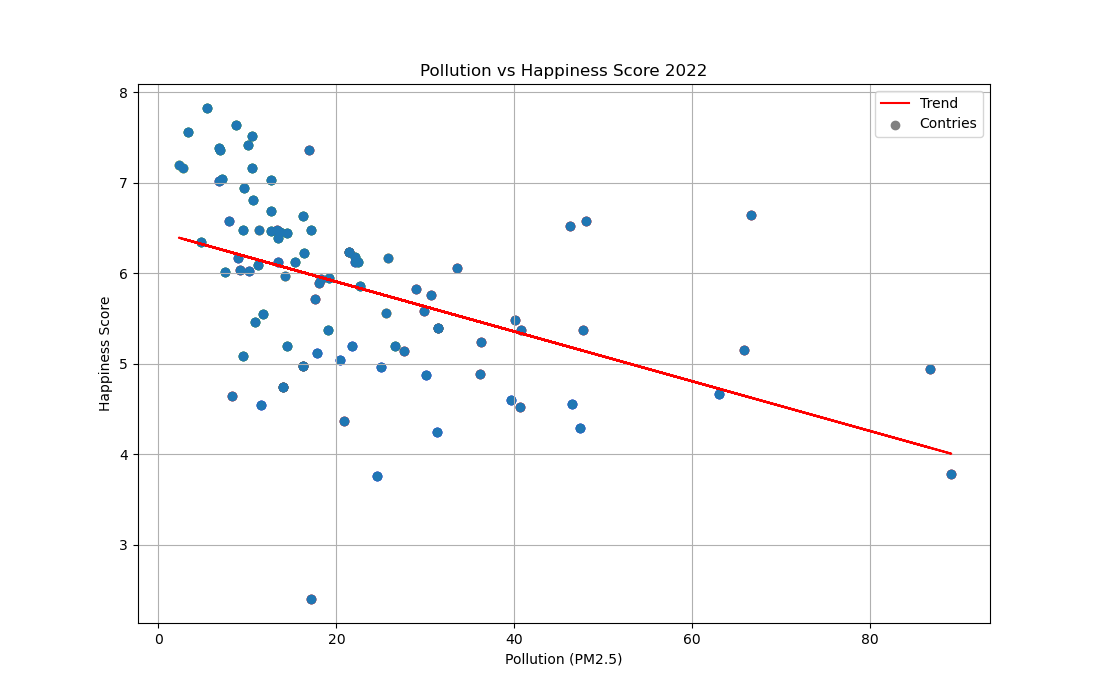

In [19]:
x = analysis.iloc[:, 2]
y = analysis.iloc[:, 3]

data_linreg = np.polyfit(x, y, 1)

xp = np.linspace(2, 2, 156)
lr = np.polyval(data_linreg, xp)

fig = plt.figure(figsize = (11,7))
ax = fig.add_subplot()
ax.grid()
ax.set_xlabel('Pollution (PM2.5)')
ax.set_ylabel('Happiness Score')
ax.set_title('Pollution vs Happiness Score 2022')
model = np.polyfit(analysis['PM2.5'], analysis['Happiness Score'], 1)
ax.plot(analysis['PM2.5'], np.polyval(model, analysis['PM2.5']), color='r')

continents = analysis['Continent']  # Anta att du har en kolumn för kontinenterna i din DataFrame
ax.scatter(x, y, color='grey')
continent_colors = {'Europe': 'green', 'North America': 'purple',  'South America': 'orange', 'Asia': 'red', 'Africa': 'blue', 'Oceania': 'yellow'}
for continent, color in continent_colors.items():
    # Hämta index för länder i nuvarande kontinent
    continent_indices = (continents == continent)
    # Rita scatterplotten för länder i nuvarande kontinent med färgen för kontinenten
    ax.scatter(x[continent_indices], y[continent_indices], color=color, label=continent)


ax.scatter(x, y)
ax.plot(xp, lr)
ax.legend(["Trend", "Contries"])

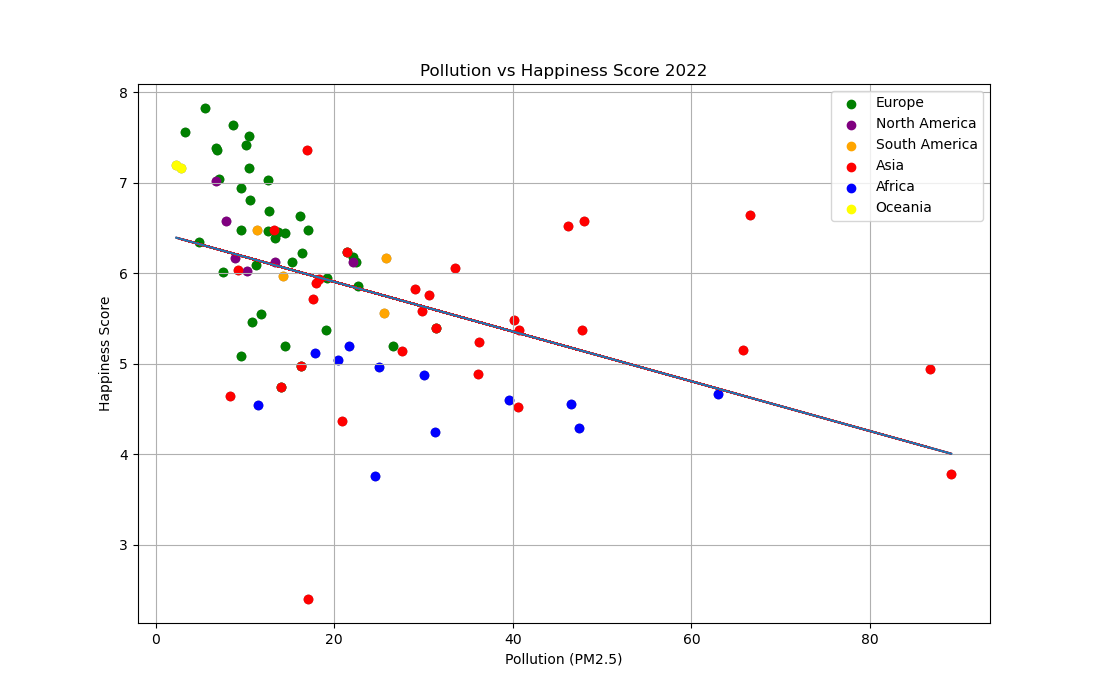

In [22]:
import numpy as np
import matplotlib.pyplot as plt

x = analysis.iloc[:, 2]
y = analysis.iloc[:, 3]
continents = analysis['Continent']  # Anta att du har en kolumn för kontinenterna i din DataFrame

data_linreg = np.polyfit(x, y, 1)
xp = np.linspace(x.min(), x.max(), 156)
lr = np.polyval(data_linreg, xp)

fig = plt.figure(figsize=(11, 7))
ax = fig.add_subplot()
ax.grid()
ax.set_xlabel('Pollution (PM2.5)')
ax.set_ylabel('Happiness Score')
ax.set_title('Pollution vs Happiness Score 2022')

model = np.polyfit(analysis['PM2.5'], analysis['Happiness Score'], 1)
ax.plot(analysis['PM2.5'], np.polyval(model, analysis['PM2.5']), color='r')


ax.scatter(x, y, color='grey')


continent_colors = {'Europe': 'green', 'North America': 'purple',  'South America': 'orange', 'Asia': 'red', 'Africa': 'blue', 'Oceania': 'yellow'}

for continent, color in continent_colors.items():
    # Hämta index för länder i nuvarande kontinent
    continent_indices = (continents == continent)
    # Rita scatterplotten för länder i nuvarande kontinent med färgen för kontinenten
    ax.scatter(x[continent_indices], y[continent_indices], color=color, label=continent)
ax.plot(xp, lr)
ax.legend()
plt.show()

In [ ]:
#Activate interactive mode
%matplotlib widget

In [23]:
#interaktivt med alla kontintenter



import ipywidgets as widgets
from ipywidgets import interact
import mplcursors

def erase_plot():
    ax.clear()

def f(north_america, south_america, europe, asia, africa, oceania, regforall):
    erase_plot()

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot()
    ax.set_xlabel('PM2.5 (Pollution level 2022)')
    ax.set_ylabel('Happiness Score 2022')
    ax.grid()
    
    if(north_america==True):
        # Filter the data for only North American countries
        north_america_data = analysis[analysis['Continent'] == 'North America']
        ax.scatter(north_america_data["PM2.5"], north_america_data["Happiness Score"], label='North America', color='purple')
        
        model = np.polyfit(north_america_data['PM2.5'], north_america_data['Happiness Score'], 1)
        ax.plot(north_america_data['PM2.5'], np.polyval(model, north_america_data['PM2.5']), color='purple')

    if(south_america==True):
        south_america_data = analysis[analysis['Continent'] == 'South America']
        ax.scatter(south_america_data["PM2.5"], south_america_data["Happiness Score"], label='South_america', color='orange')
        
        model = np.polyfit(south_america_data['PM2.5'], south_america_data['Happiness Score'], 1)
        ax.plot(south_america_data['PM2.5'], np.polyval(model, south_america_data['PM2.5']), color='orange')

    if(europe==True):
        europe_data = analysis[analysis['Continent'] == 'Europe']
        ax.scatter(europe_data["PM2.5"], europe_data["Happiness Score"], label='Europe', color='green')

        model = np.polyfit(europe_data['PM2.5'], europe_data['Happiness Score'], 1)
        ax.plot(europe_data['PM2.5'], np.polyval(model, europe_data['PM2.5']), color='green')

    if(asia==True):
        asia_data = analysis[analysis['Continent'] == 'Asia']
        ax.scatter(asia_data["PM2.5"], asia_data["Happiness Score"], label='Asia', color='red')
    
        model = np.polyfit(asia_data['PM2.5'], asia_data['Happiness Score'], 1)
        ax.plot(asia_data['PM2.5'], np.polyval(model, asia_data['PM2.5']), color='red')

    if(africa==True):
        africa_data = analysis[analysis['Continent'] == 'Africa']
        ax.scatter(africa_data["PM2.5"], africa_data["Happiness Score"], label='Africa', color='blue')

        model = np.polyfit(africa_data['PM2.5'], africa_data['Happiness Score'], 1)
        ax.plot(africa_data['PM2.5'], np.polyval(model, africa_data['PM2.5']), color='blue')

    if(oceania==True):
        oceania_data = analysis[analysis['Continent'] == 'Oceania']
        ax.scatter(oceania_data["PM2.5"], oceania_data["Happiness Score"], label='Oceania', color='yellow')

        model = np.polyfit(oceania_data['PM2.5'], oceania_data['Happiness Score'], 1)
        ax.plot(oceania_data['PM2.5'], np.polyval(model, oceania_data['PM2.5']), color='yellow')
    
    if regforall==True:
        model = np.polyfit(analysis['PM2.5'], analysis['Happiness Score'], 1)
        ax.plot(analysis['PM2.5'], np.polyval(model, analysis['PM2.5']), color='black')


    if(south_america==True or north_america==True or europe==True or asia==True or africa==True or oceania==True or regforall==True):
        ax.legend()
    if(south_america==False and north_america==False and europe==False and asia==False and africa==False and oceania==False, regforall==True):
        ax.legend('', frameon=False)
        
    ax.set_title('PM2.5 vs Happiness Score 2022')


    # After plotting all points, enable mplcursors
    cursor = mplcursors.cursor(ax, hover=True)

    @cursor.connect("add")
    def on_add(sel):
        # Get the selected point's data
        x, y = sel.target
        # Find the country name in the dataframe
        country = analysis[(analysis['PM2.5'] == x) & (analysis['Happiness Score'] == y)]['Country'].values[0]
        # Display the country name in the annotation box
        sel.annotation.set_text(f'Country: {country}\nPM2.5: {x}\nHappiness Score: {y}')

    plt.show()

interact(f, north_america=False, south_america=False, europe=False, asia=False, africa=False, oceania=False, regforall=False)

interactive(children=(Checkbox(value=False, description='north_america'), Checkbox(value=False, description='s…

<function __main__.f(north_america, south_america, europe, asia, africa, oceania, regforall)>

IndexError: index 0 is out of bounds for axis 0 with size 0

IndexError: index 0 is out of bounds for axis 0 with size 0

StopIteration: 

StopIteration: 

IndexError: index 0 is out of bounds for axis 0 with size 0

IndexError: index 0 is out of bounds for axis 0 with size 0

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 